<html> <h1 style="font-style:bold; color:blue;">MLP</h1> </html>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

In [2]:
np.random.seed(42)

<html> <h3 style="font-style:bold; color:blue;">1. Download Ask & Bid datasets</h3> </html>

In [4]:
df_Ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_Bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

In [5]:
print(df_Ask.head(3))
print(df_Ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [6]:
print(df_Bid.head(3))
print(df_Bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [7]:
df_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [10]:
df_Ask.shape

(35220, 6)

In [16]:
df_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [18]:
df_Bid.shape

(35220, 6)

<html> <h3 style="font-style:bold; color:blue;">2. Merge Ask & Bid datasets</h3> </html>

In [21]:
df_2023 = df_Bid.merge(df_Ask, left_on = 'Time (UTC)', right_on = 'Time (UTC)', how = 'outer')
df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [23]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [25]:
# rename columns

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [27]:
df_2023.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882


In [29]:
df_2023.tail(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.069,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.216,22.776,22.797,22.774,22.786,0.6836
35219,2023.06.30 20:55:00,22.756,22.766,22.701,22.745,0.327,22.786,22.811,22.786,22.811,0.3712


In [31]:
df_2023.dtypes

Local time     object
Open_Bid      float64
High_Bid      float64
Low_Bid       float64
Close_Bid     float64
Volume_Bid    float64
Open_Ask      float64
High_Ask      float64
Low_Ask       float64
Close_Ask     float64
Volume_Ask    float64
dtype: object

In [33]:
file_obj2 = open('df_2023.csv', 'w')
df_2023.to_csv('df_2023.csv', encoding = 'utf-8', index = False)
file_obj2.close()

In [35]:
df_2023 = []
df_2023

[]

In [37]:
df = pd.read_csv('df_2023.csv', low_memory=False, sep=',')

In [39]:
df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [41]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

In [43]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


In [45]:
data = df.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis = 1)

In [47]:
df.shape

(35220, 17)

In [49]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050


In [51]:
data.tail(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.069,0.4212,0.3522,0.3522,0.03,0.030,0.030,0.030
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.216,0.6836,0.4676,0.4676,0.03,0.036,0.038,0.030
35219,2023.06.30 20:55:00,22.756,22.766,22.701,22.745,0.327,0.3712,0.0442,0.0442,0.03,0.045,0.085,0.066


In [53]:
import datetime

In [55]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc = True)

In [57]:
data = data.drop(['Local time'], axis = 1)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          35220 non-null  float64            
 1   High_Bid          35220 non-null  float64            
 2   Low_Bid           35220 non-null  float64            
 3   Close_Bid         35220 non-null  float64            
 4   Volume_Bid        35220 non-null  float64            
 5   Volume_Ask        35220 non-null  float64            
 6   Volume_Delta      35220 non-null  float64            
 7   Volume_Delta_abs  35220 non-null  float64            
 8   Open_Delta        35220 non-null  float64            
 9   High_Delta        35220 non-null  float64            
 10  Low_Delta         35220 non-null  float64            
 11  Close_Delta       35220 non-null  float64            
 12  Local_time_T      35220 non-null  datetime64[ns, UTC]
dtypes

In [61]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00


In [63]:
data.tail(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
35217,22.751,22.751,22.746,22.746,0.069,0.4212,0.3522,0.3522,0.03,0.030,0.030,0.030,2023-06-30 20:45:00+00:00
35218,22.746,22.761,22.736,22.756,0.216,0.6836,0.4676,0.4676,0.03,0.036,0.038,0.030,2023-06-30 20:50:00+00:00
35219,22.756,22.766,22.701,22.745,0.327,0.3712,0.0442,0.0442,0.03,0.045,0.085,0.066,2023-06-30 20:55:00+00:00


<html> <h3 style="font-style:bold; color:blue;">3. Plot price and volume charts</h3> </html>

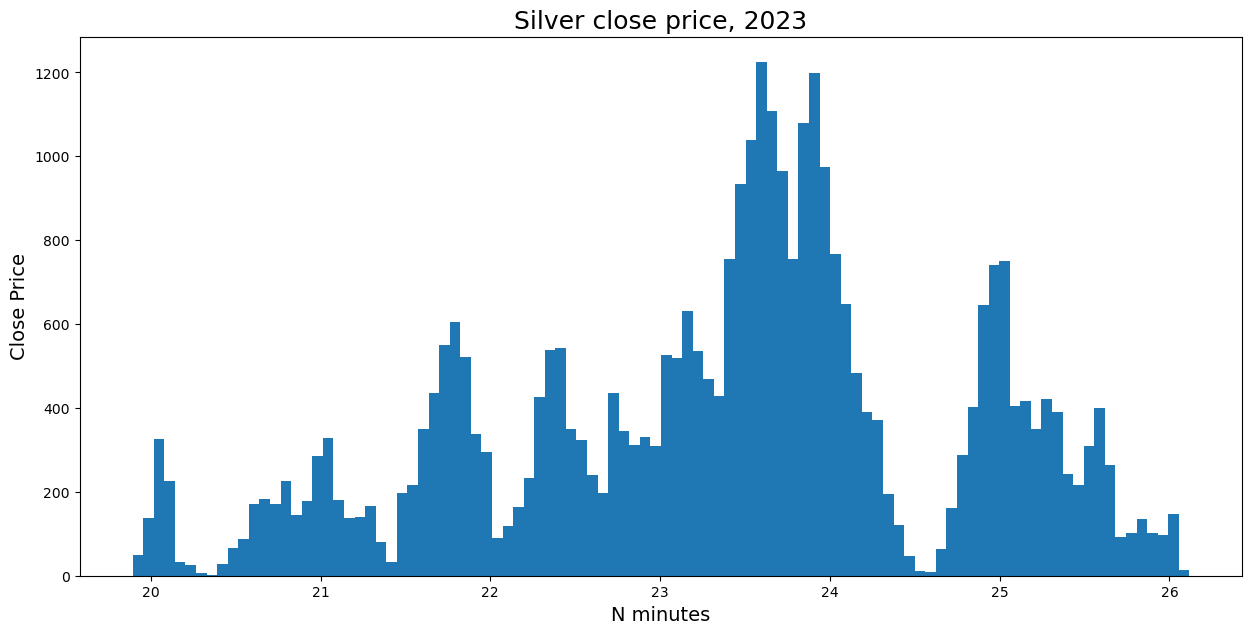

In [66]:
plt.figure(num =1, figsize =(15,7))
plt.hist(data['Close_Bid'], bins =100)
plt.title('Silver close price, 2023', size = 18)
plt.ylabel('Close Price', size = 14)
plt.xlabel('N minutes', size = 14)
plt.show()

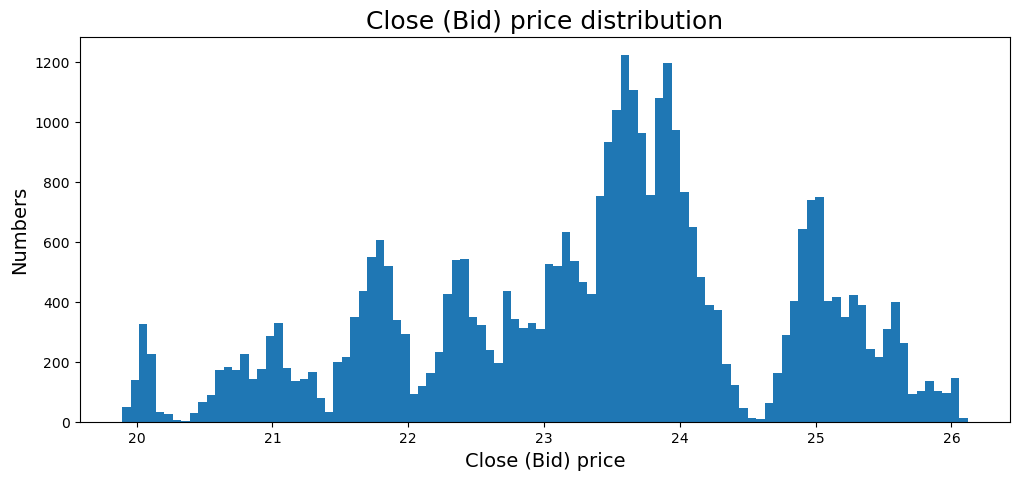

In [67]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);

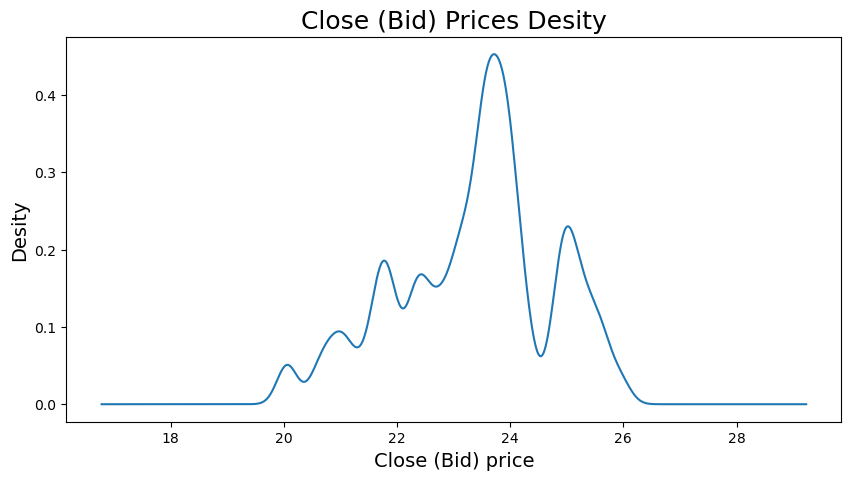

In [69]:
plt.figure(num=1,figsize=(10,5))
data['Close_Bid'].plot.kde()
plt.title('Close (Bid) Prices Desity',size=18)
plt.ylabel('Desity',size=14)
plt.xlabel('Close (Bid) price',size=14);

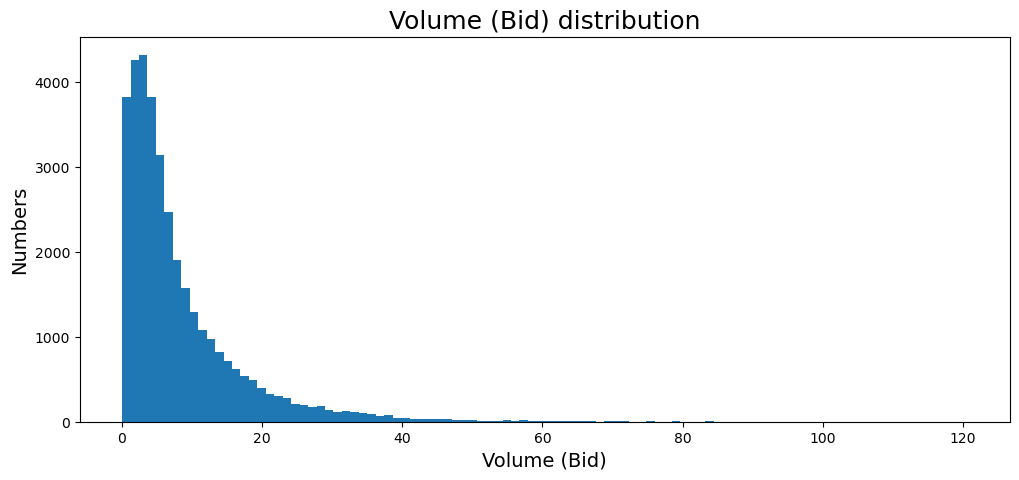

In [71]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

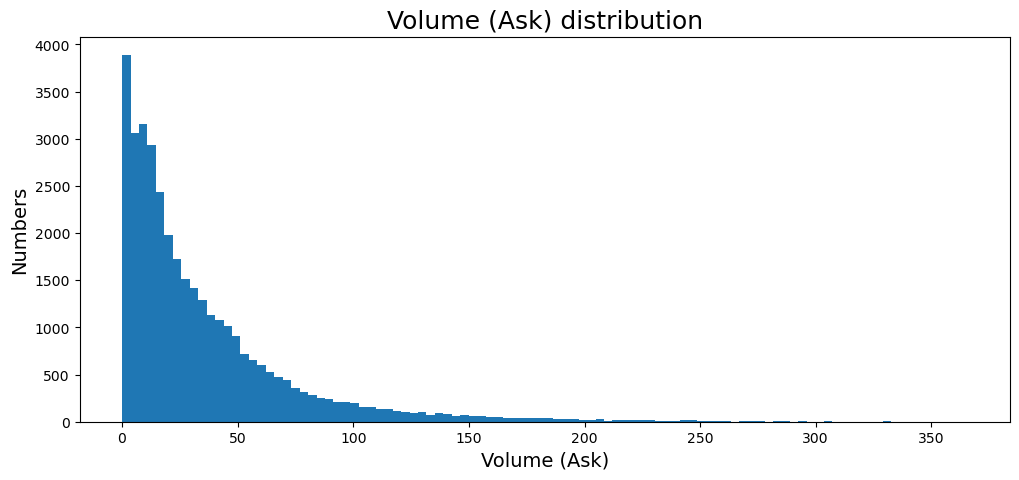

In [72]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Ask)',size=14);

<html> <h3 style="font-style:bold; color:blue;">4. Normalisation</h3> </html>

In [75]:
data2 = data.drop(['Local_time_T'],axis =1)

In [77]:
data2.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050


In [81]:
data2.tail(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
35217,22.751,22.751,22.746,22.746,0.069,0.4212,0.3522,0.3522,0.03,0.030,0.030,0.030
35218,22.746,22.761,22.736,22.756,0.216,0.6836,0.4676,0.4676,0.03,0.036,0.038,0.030
35219,22.756,22.766,22.701,22.745,0.327,0.3712,0.0442,0.0442,0.03,0.045,0.085,0.066


In [83]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
dtypes: float64(12)
memory usage: 3.2 MB


In [85]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

In [87]:
data_length = len(data)
data_length

35220

In [89]:
train_size = int(round(data_length*0.8, -3))
train_size

28000

In [91]:
train =data2.iloc[:train_size]
train.shape

(28000, 14)

In [93]:
train.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
27998,23.049,23.091,23.049,23.067,4.7839,34.8313,30.0474,30.0474,0.03,0.03,0.03,0.03,23.091,23.079
27999,23.074,23.080,23.029,23.039,5.0757,27.9602,22.8845,22.8845,0.03,0.03,0.03,0.03,23.080,23.059


In [95]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

26.153

In [97]:
min_price = train['Low_Bid'].min()
min_price

19.888

In [99]:
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

365.6322

In [101]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

0.30900000000000105

In [103]:
max_Delta = round(max_Delta,3)
max_Delta

0.309

In [105]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

0.0009999999999976694

In [107]:
min_Delta = round(min_Delta,3)
min_Delta

0.001

In [109]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

317.5858

In [111]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-48.7912

In [113]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

317.5858

In [115]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [117]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [119]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [121]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [123]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [125]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

In [127]:
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671030,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,0.677095,0.671349
2,0.671349,0.671987,0.651875,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,0.660176,0.660016


In [129]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  Y_High_Bid        35220 non-null  float64
 13  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14)
memory usage: 3.8 MB


In [131]:
data2.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,3.522000e+04,35220.000000,35220.000000
mean,0.553769,0.556522,0.550748,0.553770,0.022654,0.095985,0.206354,0.084729,0.905157,0.905155,0.904980,9.054087e-01,0.556522,0.555579
std,0.218481,0.218488,0.218504,0.218494,0.024550,0.106733,0.091225,0.104995,0.010534,0.010974,0.016278,1.250475e-02,0.218488,0.218507
min,0.000798,0.004150,0.000000,0.000798,0.000000,0.000000,0.000000,0.000000,0.402597,0.282468,-0.324675,-3.424389e-15,0.004150,0.004789
25%,0.404429,0.407342,0.400958,0.404310,0.007141,0.025894,0.147285,0.016490,0.905844,0.905844,0.905844,9.058442e-01,0.407342,0.405746
50%,0.586113,0.588667,0.583400,0.586113,0.014580,0.060819,0.173862,0.047034,0.905844,0.905844,0.905844,9.058442e-01,0.588667,0.588188
75%,0.675818,0.679330,0.672785,0.675818,0.029227,0.127558,0.231854,0.113856,0.905844,0.905844,0.905844,9.058442e-01,0.679330,0.677574
max,0.994413,0.995211,0.991221,0.994413,0.329981,1.000000,1.000000,1.000000,0.967532,0.944805,1.000000,9.642857e-01,0.995211,0.996010


In [133]:
columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']


In [135]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast = 'float')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Volume_Ask        35220 non-null  float32
 6   Volume_Delta      35220 non-null  float32
 7   Volume_Delta_abs  35220 non-null  float32
 8   Open_Delta        35220 non-null  float32
 9   High_Delta        35220 non-null  float32
 10  Low_Delta         35220 non-null  float32
 11  Close_Delta       35220 non-null  float32
 12  Y_High_Bid        35220 non-null  float32
 13  Y_Low_Ask         35220 non-null  float32
dtypes: float32(14)
memory usage: 1.9 MB


In [137]:
# Writing a normalised dataset to disk in file Silver_2023_normilised.csv

file_obj1 = open('Silver_2023_normilised.csv', 'w')
data2.to_csv('Silver_2023_normilised.csv', encoding='utf-8', index=False)
file_obj1.close()

In [138]:
data2 = pd.read_csv('Silver_2023_normilised.csv', low_memory = False, sep = ',')
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671029,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,0.677095,0.671349
2,0.671349,0.671987,0.651876,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,0.660176,0.660016


In [141]:
data2.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
35215,0.457143,0.457143,0.455387,0.456185,0.000753,0.004924,0.137334,0.004802,0.905844,0.905844,0.905844,0.905844,0.457143,0.460176
35216,0.454589,0.456983,0.454589,0.456185,0.000386,0.002070,0.134853,0.001939,0.876623,0.905844,0.876623,0.905844,0.456983,0.460814
35217,0.456983,0.456983,0.456185,0.456185,0.000189,0.001152,0.134133,0.001109,0.905844,0.905844,0.905844,0.905844,0.456983,0.460974
35218,0.456185,0.458579,0.454589,0.457781,0.000591,0.001870,0.134448,0.001472,0.905844,0.886364,0.879870,0.905844,0.458579,0.460654
35219,0.457781,0.459377,0.449002,0.456026,0.000894,0.001015,0.133293,0.000139,0.905844,0.857143,0.727273,0.788961,0.459377,0.462570


In [143]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  Y_High_Bid        35220 non-null  float64
 13  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14)
memory usage: 3.8 MB


In [145]:
data2.shape

(35220, 14)

<Figure size 1200x500 with 0 Axes>

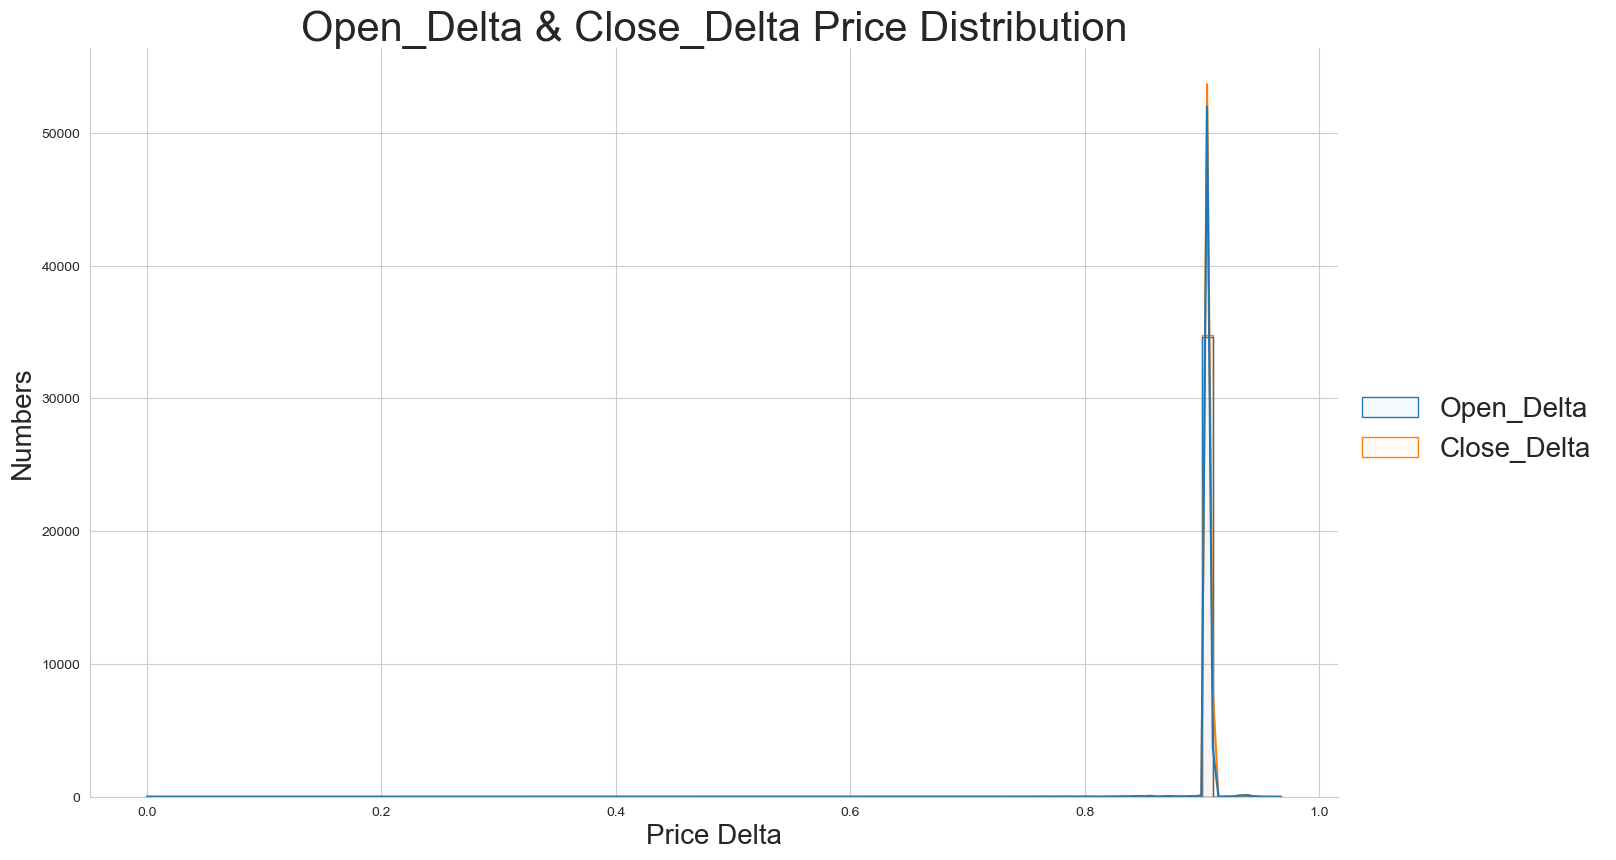

In [147]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

<html> <h3 style="font-style:bold; color:blue;">5. Shift the Min and Max prices</h3> </html>

In [149]:
n = data2.shape[0]
n

35220

In [150]:
p = data2.shape[1]
p

14

In [151]:
data_ax = data2.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [156]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
dtypes: float64(12)
memory usage: 3.2 MB


In [158]:
data_ax.shape

(35220, 12)

In [160]:
data_ay = data2[['Y_High_Bid', 'Y_Low_Ask']]

In [162]:
data_ay.shape

(35220, 2)

In [164]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,0.665762,0.669593
1,0.677095,0.671349
2,0.671987,0.659856
3,0.653152,0.654110
4,0.660176,0.660016
5,0.666081,0.667997


In [166]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,0.458420,0.460335
35211,0.457302,0.459697
35212,0.457302,0.459697
35213,0.456345,0.458101
35214,0.457143,0.459856
35215,0.457143,0.460176
35216,0.456983,0.460814
35217,0.456983,0.460974
35218,0.458579,0.460654
35219,0.459377,0.462570


In [168]:
data_ay = data_ay.shift(-1)

In [170]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,0.677095,0.671349
1,0.671987,0.659856
2,0.653152,0.654110
3,0.660176,0.660016
4,0.666081,0.667997
5,0.672466,0.670710


In [172]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,0.457302,0.459697
35211,0.457302,0.459697
35212,0.456345,0.458101
35213,0.457143,0.459856
35214,0.457143,0.460176
35215,0.456983,0.460814
35216,0.456983,0.460974
35217,0.458579,0.460654
35218,0.459377,0.462570
35219,NaN,NaN


In [174]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [176]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
0,0.677095,0.671349,0.677095,0.654110
1,0.671987,0.659856,0.672466,0.654110
2,0.653152,0.654110,0.672466,0.654110
3,0.660176,0.660016,0.672466,0.660016
4,0.666081,0.667997,0.672466,0.666241
5,0.672466,0.670710,0.672466,0.666241


In [178]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
35210,0.457302,0.459697,0.457302,0.458101
35211,0.457302,0.459697,0.457302,0.458101
35212,0.456345,0.458101,0.457143,0.458101
35213,0.457143,0.459856,0.458579,0.459856
35214,0.457143,0.460176,0.459377,0.460176
35215,0.456983,0.460814,NaN,NaN
35216,0.456983,0.460974,NaN,NaN
35217,0.458579,0.460654,NaN,NaN
35218,0.459377,0.462570,NaN,NaN
35219,NaN,NaN,NaN,NaN


In [180]:
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis =1)

In [182]:
data_ay.tail(6)

,Y_High_Bid_5,Y_Low_Ask_5
35214,0.459377,0.460176
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN
35219,NaN,NaN


In [184]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 5 minutes)

for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)


In [186]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 5 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

In [188]:
data_ay.shape

(35215, 2)

In [190]:
data_ax.shape

(35215, 12)

<html> <h3 style="font-style:bold; color:blue;">6. Separate inputs & outputs matrices</h3> </html>

In [193]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[6.6209e-01 6.6576e-01 6.5906e-01 6.6576e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 7.8896e-01 7.8896e-01 7.8896e-01 7.8896e-01]
 [6.6656e-01 6.7710e-01 6.6656e-01 6.7103e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.0584e-01 8.1494e-01 9.0584e-01 8.4416e-01]]


[[0.4541 0.4563 0.4533 0.4555 0.0053 0.0095 0.1374 0.0049 0.9058 0.9058
  0.9058 0.9058]
 [0.4555 0.4571 0.4551 0.4571 0.001  0.004  0.1362 0.0034 0.9058 0.9058
  0.9058 0.9058]]
numpy size: =  (35215, 12)
type:  float64


In [195]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.677095   0.65411013]
 [0.6724661  0.65411013]
 [0.6724661  0.65411013]]


[[0.45714286 0.45810056]
 [0.45857942 0.45985633]
 [0.4593775  0.46017557]]
numpy size: =  (35215, 2)
type:  float64


In [197]:
data2 = []
data2

[]

<html> <h3 style="font-style:bold; color:blue;">7. Create a 3D tensor</h3> </html>

In [200]:
from tqdm import tqdm

In [202]:
n_small = 30000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ', L,N,t)

Size of a three-dimensional inputs tensor:  29950 50 12


In [204]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [206]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [208]:
# fill the inputs 3D tensor (data_b) 

print('L = n_small - N - 5 = ', n_small-N-5, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 132298.77it/s]

29949
data_b: 
 [[[0.66209096 0.6657622  0.6590583  ... 0.78896105 0.78896105 0.78896105]
  [0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  ...
  [0.69114125 0.6964086  0.6901836  ... 0.90584415 0.90584415 0.90584415]
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]]

 [[0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6526736  0.6531524  0.64644855 ... 0.8474026  0.8474026  0.8474026 ]
  ...
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]
  [0.7114126  0.7122107  0.7056664  ... 0.90584415 0.90584415 0.90584415]]

 [[0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6

In [210]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  26905
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.6381484 		 0.64213884
0.63511574 		 0.64213884
0.63846767 		 0.64213884
0.6378292 		 0.6424581
0.6392658 		 0.6432562
0.64213884 		 0.6434158
0.6413408 		 0.6434158
0.6419793 		 0.6434158
0.6424581 		 0.6434158
0.6432562 		 0.6434158
0.6434158 		 0.6413408
0.6413408 		 0.6407023
0.6407023 		 0.6400638
0.6386273 		 0.6400638
0.6386273 		 0.6400638


In [213]:
data_d = np.array(data_ax)

print("data_d:")
print(data_d[:5,:], '\n')
print(data_d[-5:,:])
print("type: ", data_d.dtype)

data_d:
[[6.6209096e-01 6.6576220e-01 6.5905830e-01 6.6576220e-01 9.5177610e-04
  9.5998110e-04 1.3318030e-01 9.4462660e-06 7.8896105e-01 7.8896105e-01
  7.8896105e-01 7.8896105e-01]
 [6.6656023e-01 6.7709500e-01 6.6656023e-01 6.7102950e-01 5.0482424e-03
  3.1589120e-03 1.3128662e-01 2.1751602e-03 9.0584415e-01 8.1493510e-01
  9.0584415e-01 8.4415585e-01]
 [6.7134875e-01 6.7198724e-01 6.5187550e-01 6.5267360e-01 2.4696950e-03
  2.4122603e-03 1.3311480e-01 6.6123870e-05 8.4415585e-01 8.4090906e-01
  8.4090906e-01 8.4090906e-01]
 [6.5267360e-01 6.5315240e-01 6.4644855e-01 6.5315240e-01 2.4450800e-03
  2.4450800e-03 1.3317211e-01 0.0000000e+00 8.4415585e-01 8.4740260e-01
  8.4740260e-01 8.4740260e-01]
 [6.5283320e-01 6.6017556e-01 6.5251400e-01 6.6001594e-01 2.4286702e-03
  2.4735238e-03 1.3321687e-01 5.1639590e-05 8.4740260e-01 8.4415585e-01
  8.5064936e-01 8.4090906e-01]] 

[[0.45810056 0.4584198  0.45554668 0.4557063  0.01015747 0.01737976
  0.14037971 0.00831492 0.90584415 0.90584415 

In [215]:
data = []
data2 = []
data_ax = []
data_ay = []
data_a = []
data_y = []

<html> <h3 style="font-style:bold; color:blue;">8. Create and train neural network(MLP)</h3> </html>

In [218]:
n = data_d.shape[0]
train_start = 0
train_end = int(np.floor(0.8*n))
print(train_end)

28172


In [220]:
train_end -=12
print(train_end)

28160


In [222]:
test_start = train_end
test_end = n

data_train = data_d[np.arange(train_start, train_end), :]
data_test = data_d[np.arange(test_start, test_end), :]

In [224]:
print('Data for training:', data_train.shape)
print('Data for testing:', data_test.shape)

Data for training: (28160, 12)
Data for testing: (7055, 12)


In [226]:
data_d = []
data_d

[]

In [228]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [230]:
scaler.fit(data_train)

data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

In [232]:
print(data_train_norm.min())
print(data_train_norm.max(), '\n')

print(data_test_norm.min())
print(data_test_norm.max())

0.0
1.0000000000000002 

-0.48363636314763625
1.0235294249799312


In [234]:
X_train = data_train_norm[:, 1:]
y_train = data_train_norm[:, 0]
X_test = data_test_norm[:, 1:]
y_test = data_test_norm[:, 0]

In [236]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28160, 11)
(28160,)
(7055, 11)
(7055,)


In [238]:
# import TensorFlow and Keras

import tensorflow as tf
from tensorflow import keras

In [239]:
print(tf.__version__)

2.18.0


In [240]:
np.random.seed(42)

In [241]:
model = keras.Sequential([

    keras.layers.Dense(128, input_dim = 11 , activation = tf.nn.relu, kernel_initializer = "normal"),

    keras.layers.Dense(64, activation = 'relu', kernel_initializer = "normal"),

    keras.layers.Dense(32, activation = 'relu', kernel_initializer = "normal"),

    keras.layers.Dense(1)

])

print(model.summary())

C:\Users\dhami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [242]:
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [243]:
history = model.fit(X_train, y_train, batch_size =10, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0117 - mae: 0.0338 - val_loss: 1.6433e-05 - val_mae: 0.0034
Epoch 2/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.4079e-05 - mae: 0.0037 - val_loss: 7.5355e-06 - val_mae: 0.0019
Epoch 3/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8887e-05 - mae: 0.0041 - val_loss: 8.3578e-06 - val_mae: 0.0020
Epoch 4/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.7662e-05 - mae: 0.0040 - val_loss: 4.0857e-05 - val_mae: 0.0058
Epoch 5/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3332e-05 - mae: 0.0037 - val_loss: 7.5838e-05 - val_mae: 0.0083
Epoch 6/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3507e-05 - mae: 0.0037 - val_loss: 2.5384e-05 - val_mae: 0.0045
Epoch 7/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3140e-05 - mae: 0.0037 - val_loss: 7.3889e-06 - val_mae: 0.0018
Epoch 8/20
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2395e-05 - mae: 0.0036 - val_loss: 3.4337e-0

<html> <h3 style="font-style:bold; color:blue;">9. Calcualte MSE & MAE on Test dataset</h3> </html>

In [245]:
mse, mae = model.evaluate(X_test, y_test, verbose = 0)

print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

Mean absolute error: 0.00241
Mean squared error: 0.00001


<html> <h3 style="font-style:bold; color:blue;">10. Plotting the results graphs</h3> </html>

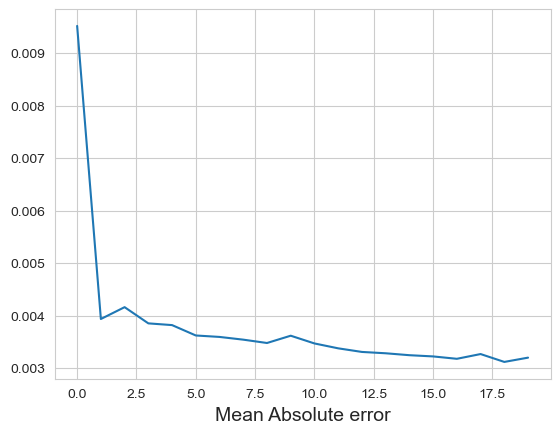

In [247]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

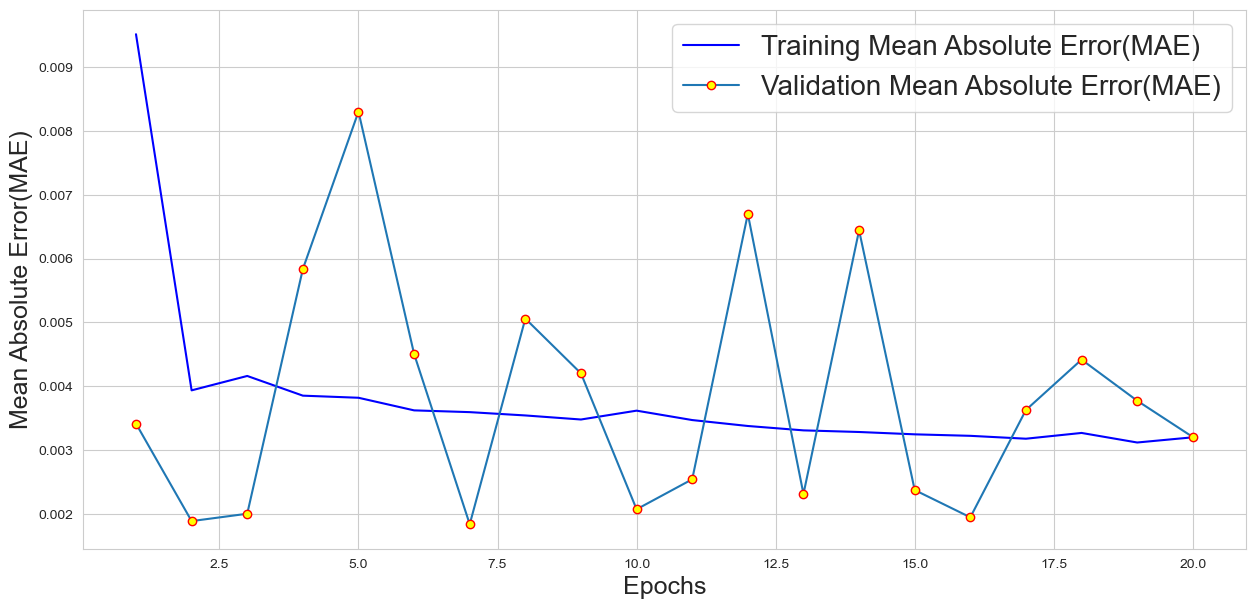

In [248]:
history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()  
#plt.legend(loc = 'upper right', prop={'size':12}) (need to pass the arguments if the labels are not located on the top right corner) 
plt.show()

Text(0.5, 0, 'Mean Squared Error')

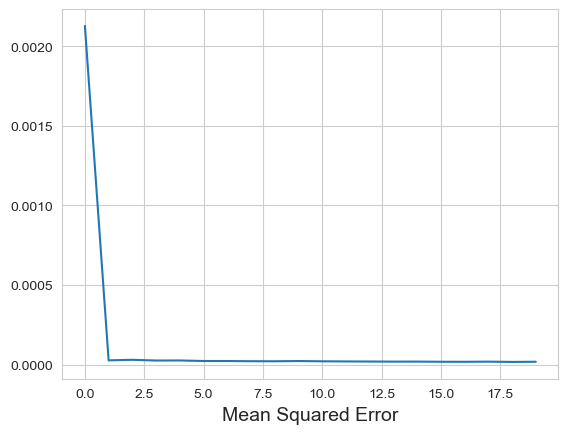

In [249]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size =14)

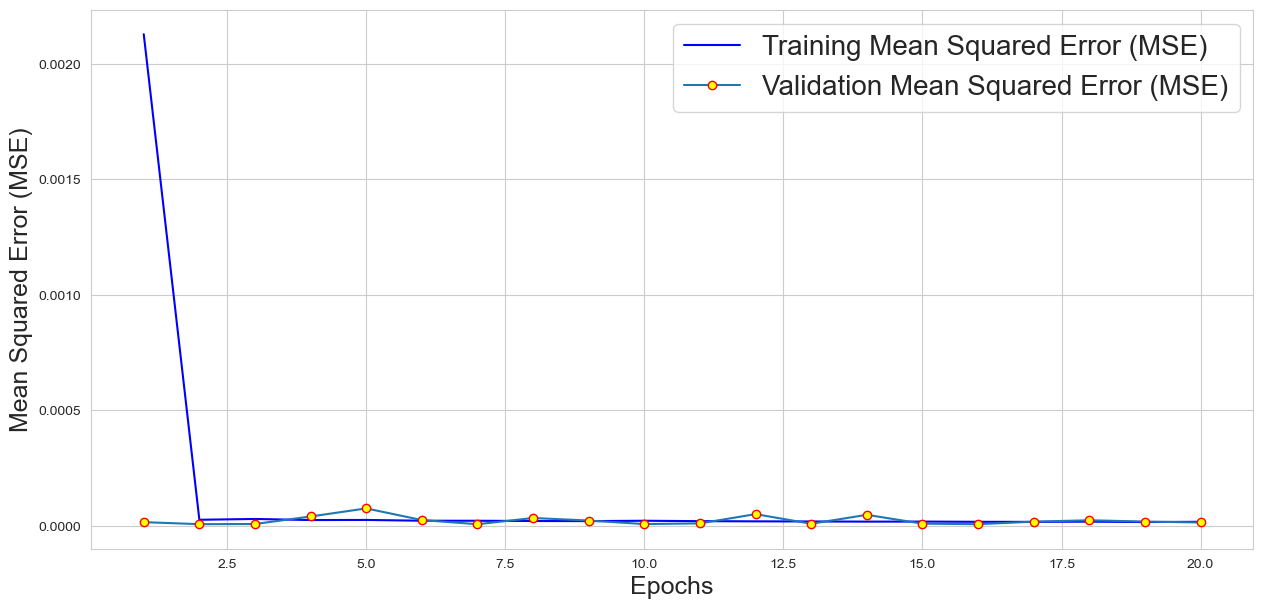

In [250]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()